In [40]:
# Purpose:
# This program uses the actionLog file from DeepThought F20 condition3 (adaptive condition)
# Calculates:
#  the average total tutor time 
#  average posttest time per student 
#  average level end posttest per student 
#  average training time per student
#
# Preprocessing:
# Remove the rows with erroneous IDs: hkaakat, sukhan
# Sort the rows based on userId, and actionCount
#
# Author:
# Nazia Alam

In [41]:
#imports
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt

In [42]:
#Read file for condition3: actionLog_L7_3_F20.csv
#Read only the necessary columns from the csv file
col_list = ["id","userID","courseID","actionCount","currentProblem","actionTime","stepTime","problemTime","sessionTime"]
df = pd.read_csv("D:/Courses/Fall2021/CSC890/Fall2020 work/Analysis/Dataset/Condition3/actionLog_L7_3_F20.csv", usecols=col_list)
print(df.shape)
#print(df.head())


(208063, 9)


In [43]:
# Preprocessing
# Remove the rows with erroneous IDs: hkaakat, sukhan

# Get indexes for the rows that should be dropped
indexNumbers = df.loc[(df['userID'] == 'hkaakat') | (df['userID'] =='sukhan')].index

# Delete these row indexes 
df.drop(indexNumbers , inplace=True)
print(df.shape)
#print(df)

(203178, 9)


In [44]:
# Preprocessing
# Sort the rows based on userId, and actionCount
dfNew = df.sort_values(by=['userID','actionCount'])
print(dfNew.shape)
print(dfNew.head)


(203178, 9)
<bound method NDFrame.head of             id   userID                             courseID  actionCount  \
39027   134280  ahagedo  NCSU;CSC226;001;STALLMANN;Fall;2020            1   
39028   134282  ahagedo  NCSU;CSC226;001;STALLMANN;Fall;2020            2   
39029   134286  ahagedo  NCSU;CSC226;001;STALLMANN;Fall;2020            3   
39030   134287  ahagedo  NCSU;CSC226;001;STALLMANN;Fall;2020            4   
39031   134288  ahagedo  NCSU;CSC226;001;STALLMANN;Fall;2020            5   
...        ...      ...                                  ...          ...   
173916  206550   yluo14  NCSU;CSC226;002;STALLMANN;Fall;2020         2035   
173917  206552   yluo14  NCSU;CSC226;002;STALLMANN;Fall;2020         2036   
173918  206553   yluo14  NCSU;CSC226;002;STALLMANN;Fall;2020         2037   
173919  206555   yluo14  NCSU;CSC226;002;STALLMANN;Fall;2020         2038   
173920  206558   yluo14  NCSU;CSC226;002;STALLMANN;Fall;2020         2039   

        currentProblem  actionTim

In [45]:
# Create the student list 
result = pd.DataFrame(columns = ['userID', 'totalTutorTime'])
result['userID'] = dfNew['userID'].unique()
print(result.shape)
print(result)

(78, 2)
      userID totalTutorTime
0    ahagedo            NaN
1     amdaum            NaN
2   askelly4            NaN
3    asnair2            NaN
4   bjjohns6            NaN
..       ...            ...
73  wcallred            NaN
74  wtmoore2            NaN
75  ychen267            NaN
76   yliu229            NaN
77    yluo14            NaN

[78 rows x 2 columns]


In [46]:
# find the number of steps where action time was capped
count = 0
for i in range(len(dfNew)):
     if(dfNew['actionTime'].iloc[i]>300):
         count = count + 1
print(count)

555


In [47]:
# Find the updated actionTime
# For each actionTime, cap it to 5 minute
dfNew['updatedActionTime'] = np.where(dfNew['actionTime'] >300 , 300, dfNew['actionTime'])
print(dfNew['updatedActionTime'])
dfNew.to_csv("actionLog_3_F20_PreprocessedTimeAnalysis.csv")

39027     0.001
39028     0.304
39029     4.017
39030     0.946
39031     0.452
          ...  
173916    0.869
173917    0.001
173918    0.001
173919    0.662
173920    1.413
Name: updatedActionTime, Length: 203178, dtype: float64


In [48]:
# Find the posttest action time
dfNew['posttestActionTime'] = np.where(dfNew['currentProblem'] >=7 ,  dfNew['updatedActionTime'],0)
result['posttestTime'] = (dfNew.groupby('userID')['posttestActionTime'].sum()).values

In [49]:
# Find the pretest action time
dfNew['pretestActionTime'] = np.where((dfNew['currentProblem'] ==1.3) | (dfNew['currentProblem'] ==1.4) ,  dfNew['updatedActionTime'],0)
result['pretestTime'] = (dfNew.groupby('userID')['pretestActionTime'].sum()).values

In [50]:
# Find the transfer task  action time
dfNew['transferTaskActionTime'] = np.where(dfNew['currentProblem'] ==7.6 ,  dfNew['updatedActionTime'],0)
result['transferTaskTime'] = (dfNew.groupby('userID')['transferTaskActionTime'].sum()).values

In [51]:
# Find the level end posttest action time
dfNew['levelEndPosttest'] = np.where(((dfNew['currentProblem']==2.8) | (dfNew['currentProblem']==3.8) | (dfNew['currentProblem']==4.8) | (dfNew['currentProblem']==5.8) | (dfNew['currentProblem']==6.8)  ),  dfNew['updatedActionTime'],0)
result['levelEndPosttest'] = (dfNew.groupby('userID')['levelEndPosttest'].sum()).values

In [52]:
# Find the training action time
dfNew['trainingTime'] = np.where(((dfNew['currentProblem']!=2.8) & (dfNew['currentProblem']!=3.8) & (dfNew['currentProblem']!=4.8) & (dfNew['currentProblem']!=5.8) & (dfNew['currentProblem']!=6.8) & (dfNew['currentProblem']<7) & (dfNew['currentProblem']>=2) ),  dfNew['updatedActionTime'],0)
result['trainingTime'] = (dfNew.groupby('userID')['trainingTime'].sum()).values

In [53]:
# Find the total tutor time per student in condition3
result['totalTutorTime'] = (dfNew.groupby('userID')['actionTime'].sum()).values
result['updatedTotalTutorTime'] = (dfNew.groupby('userID')['updatedActionTime'].sum()).values
result['totalPosttestTime'] = result['levelEndPosttest'] + result['posttestTime']
print(result.head())
result.to_csv("Result/actionLog_3_F20_ResultTimeAnalysis.csv")

     userID  totalTutorTime  posttestTime  pretestTime  transferTaskTime  \
0   ahagedo      117432.037      3168.176     7126.583          1955.220   
1    amdaum       41023.672      1993.530     2441.060           758.382   
2  askelly4        9566.400       720.724      344.322            74.471   
3   asnair2        9695.498      3267.133     2327.424          1227.575   
4  bjjohns6       22669.487      3147.691      214.442          1840.939   

   levelEndPosttest  trainingTime  updatedTotalTutorTime  totalPosttestTime  
0          9823.941      3232.135              24574.772          12992.117  
1         12955.807      4736.885              22788.121          14949.337  
2          4439.412      1877.388               7538.329           5160.136  
3          1295.468      2536.490               9695.498           4562.601  
4          1630.120      4673.513               9866.493           4777.811  


In [54]:
print(result.describe()/60)

       totalTutorTime  posttestTime  pretestTime  transferTaskTime  \
count        1.300000      1.300000     1.300000          1.300000   
mean       616.105278     58.977002    47.639244         22.511251   
std        624.821083     36.220833    32.368859         21.475015   
min         89.519383     10.750550     3.546050          1.241183   
25%        257.632204     33.710692    22.165813          6.318896   
50%        365.879500     50.543983    38.658275         15.319992   
75%        686.995092     76.821292    61.628954         29.830308   
max       3387.239350    177.988883   158.731483         93.350300   

       levelEndPosttest  trainingTime  updatedTotalTutorTime  \
count          1.300000      1.300000               1.300000   
mean          83.068340     77.091698             275.039793   
std           55.024900     40.255338             108.400646   
min            9.029200     25.056550              75.578667   
25%           45.217679     46.669696            

In [55]:
# Find the average and SD of total tutor time per student in condition3
avgTutorTime = np.mean(result['totalTutorTime'])
print(avgTutorTime)
print("in minute",(avgTutorTime/60))

print("total tutor time")
# Find the average and SD of total tutor time per student in condition3 using updated actionTime
updatedAvgTutorTime = np.mean(result['updatedTotalTutorTime'])
updatedSDTutorTime = np.std(result['updatedTotalTutorTime'])
print(updatedAvgTutorTime)
print("in minute",(updatedAvgTutorTime/60))
print("in minute sd",(updatedSDTutorTime/60))

print("final posttest")
# Find the average and SD of  posttest time per student in condition3 using updated actionTime
avgPosttestTime = np.mean(result['posttestTime'])
SDPosttestTime = np.std(result['posttestTime'])
print(avgPosttestTime)
print("in minute",(avgPosttestTime/60))
print("in minute SD",(SDPosttestTime/60))

print("level end")
# Find the average and SD level end posttest time per student in condition3 using updated actionTime
avgLevelEndPosttest = np.mean(result['levelEndPosttest'])
SDLevelEndPosttest = np.std(result['levelEndPosttest'])
print(avgLevelEndPosttest)
print("in minute",(avgLevelEndPosttest/60))
print("in minute SD",(SDLevelEndPosttest/60))

print("total posttest")
#avgTotalPosttestTime = np.mean(result['posttestTime']+result['levelEndPosttest'])
#SDTotalPosttestTime = np.std(result['posttestTime']+result['levelEndPosttest'])

avgTotalPosttestTime = np.mean(result['totalPosttestTime'])
SDTotalPosttestTime = np.std(result['totalPosttestTime'])
print(avgTotalPosttestTime)
print("in minute",(avgTotalPosttestTime/60))
print("in minute SD",(SDTotalPosttestTime/60))

print("transfer task")
# Find the average and SD transfer task posttest time per student in condition3 using updated actionTime
avgTransferPosttest = np.mean(result['transferTaskTime'])
SDTransferPosttest = np.std(result['transferTaskTime'])
print(avgTransferPosttest)
print("in minute",(avgTransferPosttest/60))
print("in minute SD",(SDTransferPosttest/60))


print("training")
# Find the average and SD training time per student in condition3 using updated actionTime
avgTrainingTime = np.mean(result['trainingTime'])
SDTrainingTime = np.std(result['trainingTime'])
print(avgTrainingTime)
print("in minute",(avgTrainingTime/60))
print("in minute SD",(SDTrainingTime/60))

36966.31665384616
in minute 616.1052775641026
total tutor time
16502.387589743594
in minute 275.0397931623932
in minute sd 107.70352847978354
final posttest
3538.6201025641026
in minute 58.97700170940171
in minute SD 35.98789871805682
level end
4984.100423076922
in minute 83.06834038461537
in minute SD 54.67103865333831
total posttest
8522.720525641025
in minute 142.0453420940171
in minute SD 67.24601826623484
transfer task
1350.6750512820513
in minute 22.511250854700855
in minute SD 21.336910775930036
training
4625.501897435897
in minute 77.09169829059829
in minute SD 39.99645848129059


(array([1.02227368e-04, 1.84009263e-04, 1.22672842e-04, 1.32895579e-04,
        4.08909473e-05, 9.20046315e-05, 3.06682105e-05, 4.08909473e-05,
        2.04454737e-05, 2.04454737e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.02227368e-05]),
 array([  541.752     ,  1795.86946667,  3049.98693333,  4304.1044    ,
         5558.22186667,  6812.33933333,  8066.4568    ,  9320.57426667,
        10574.69173333, 11828.8092    , 13082.92666667, 14337.04413333,
        15591.1616    , 16845.27906667, 18099.39653333, 19353.514     ]),
 <BarContainer object of 15 artists>)

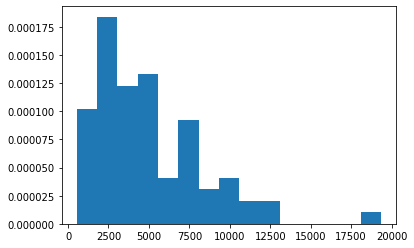

In [56]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(result['levelEndPosttest'], density=True, bins=15) 



((array([-2.37195453, -2.02429227, -1.82195584, -1.67475005, -1.55685515,
         -1.45732576, -1.37044486, -1.29283054, -1.22230774, -1.15739046,
         -1.09701584, -1.04039577, -0.98692856, -0.93614359, -0.88766522,
         -0.8411883 , -0.79646114, -0.75327338, -0.71144706, -0.67082998,
         -0.63129074, -0.59271479, -0.55500149, -0.51806168, -0.48181576,
         -0.44619218, -0.41112616, -0.37655864, -0.34243544, -0.30870647,
         -0.27532518, -0.24224798, -0.20943379, -0.17684364, -0.14444028,
         -0.11218792, -0.08005187, -0.04799829, -0.01599397,  0.01599397,
          0.04799829,  0.08005187,  0.11218792,  0.14444028,  0.17684364,
          0.20943379,  0.24224798,  0.27532518,  0.30870647,  0.34243544,
          0.37655864,  0.41112616,  0.44619218,  0.48181576,  0.51806168,
          0.55500149,  0.59271479,  0.63129074,  0.67082998,  0.71144706,
          0.75327338,  0.79646114,  0.8411883 ,  0.88766522,  0.93614359,
          0.98692856,  1.04039577,  1.

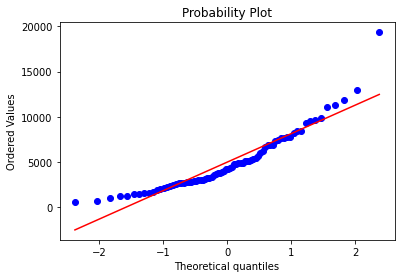

In [57]:
import scipy
import matplotlib.pyplot
scipy.stats.probplot(result['levelEndPosttest'], dist="norm", plot=matplotlib.pyplot)


((array([-2.37195453, -2.02429227, -1.82195584, -1.67475005, -1.55685515,
         -1.45732576, -1.37044486, -1.29283054, -1.22230774, -1.15739046,
         -1.09701584, -1.04039577, -0.98692856, -0.93614359, -0.88766522,
         -0.8411883 , -0.79646114, -0.75327338, -0.71144706, -0.67082998,
         -0.63129074, -0.59271479, -0.55500149, -0.51806168, -0.48181576,
         -0.44619218, -0.41112616, -0.37655864, -0.34243544, -0.30870647,
         -0.27532518, -0.24224798, -0.20943379, -0.17684364, -0.14444028,
         -0.11218792, -0.08005187, -0.04799829, -0.01599397,  0.01599397,
          0.04799829,  0.08005187,  0.11218792,  0.14444028,  0.17684364,
          0.20943379,  0.24224798,  0.27532518,  0.30870647,  0.34243544,
          0.37655864,  0.41112616,  0.44619218,  0.48181576,  0.51806168,
          0.55500149,  0.59271479,  0.63129074,  0.67082998,  0.71144706,
          0.75327338,  0.79646114,  0.8411883 ,  0.88766522,  0.93614359,
          0.98692856,  1.04039577,  1.

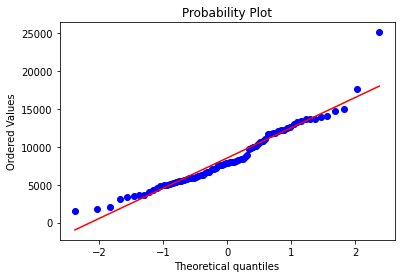

In [58]:
scipy.stats.probplot(result['totalPosttestTime'], dist="norm", plot=matplotlib.pyplot)